In [1]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

In [2]:
dataset = pandas.read_csv('Iris.csv')

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
26,27,5.0,3.4,1.6,0.4,Iris-setosa
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
35,36,5.0,3.2,1.2,0.2,Iris-setosa
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor


In [7]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

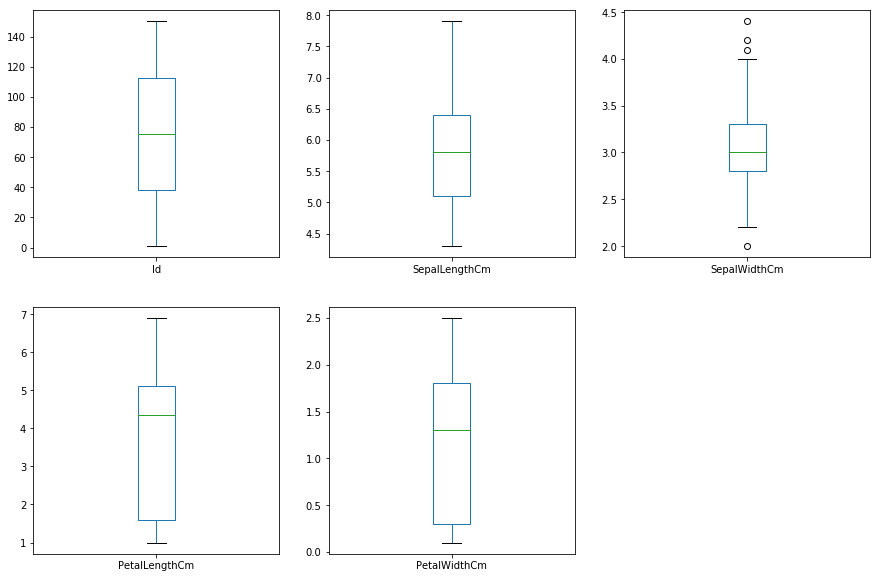

In [8]:
dataset.plot(kind = 'box', subplots=True, layout=(2,3), figsize=(15,10))
plt.show()

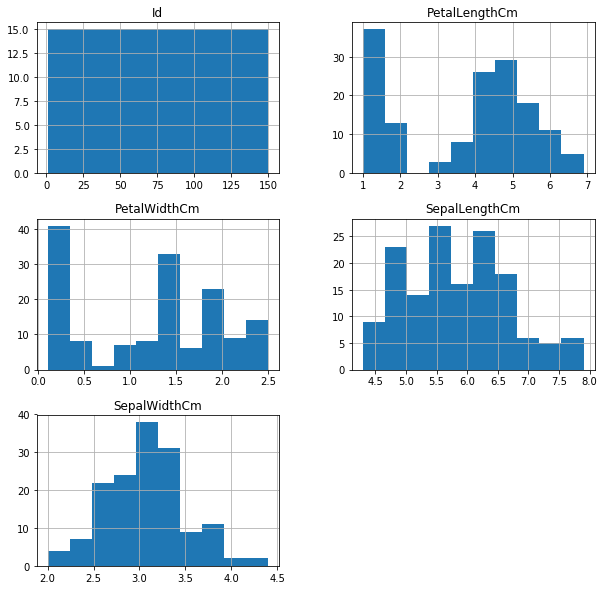

In [9]:
dataset.hist(figsize=(10,10))
plt.show()

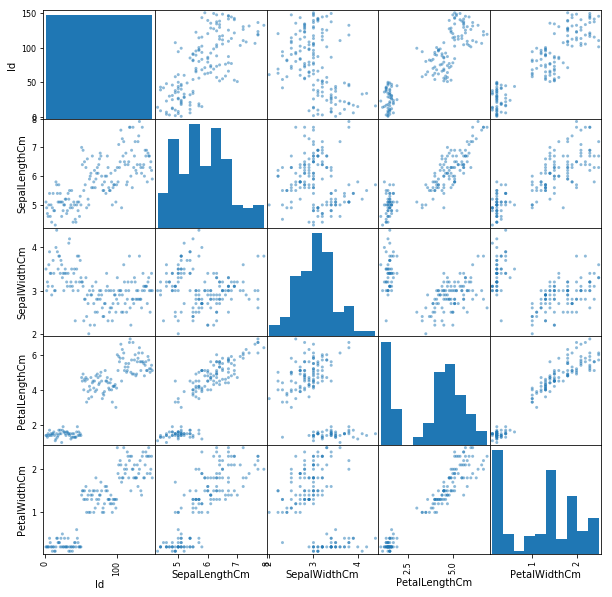

In [10]:
scatter_matrix(dataset, figsize=(10,10))
plt.show()

In [11]:
array = dataset
array.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:

X = array[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = array['Species']



The above line can also be written as  
X = array[:, 0:5]
  
Y = array[:,5]
  
[:,:] >>>> [Rows:columns]  
  
[0:n, 0:n] >>> [Some rows : some columns]



In [13]:
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = test_size, 
                                                                    random_state = seed)

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
seed = 7
scoring = 'accuracy'

We'll test the training set on various models and one which gives the maximum accuracy will be used to predict

In [16]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
    Kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=Kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, (cv_results.mean()*100), cv_results.std())
    print(msg)

LR: 93.333333 (0.081650)
LDA: 100.000000 (0.000000)
KNN: 100.000000 (0.000000)
CART: 98.333333 (0.033333)
NB: 100.000000 (0.000000)
SVM: 100.000000 (0.000000)


In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)    #Training the model
predictions = knn.predict(X_test)   #Predicting on test set
print(accuracy_score(Y_test, predictions))
print()
print(confusion_matrix(Y_test, predictions))  #Gives a relation between actual value and the predicted value
print(classification_report(Y_test, predictions))

1.0

[[ 7  0  0]
 [ 0 12  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        11

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

